Importing Necessary Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Technology.csv')

Initial Analysis

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              153
salary                2363
salary_currency         23
salary_in_usd         2730
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

Excessive analysis of work year, experience level, employment type, remote ratio, company size will need to be done.

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No null entries eases our work a lot.

In [7]:
small=['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
for col in small:
    print(df.value_counts(col))
    print(' ')

work_year
2023    8519
2024    4374
2022    1652
2021     218
2020      75
Name: count, dtype: int64
 
experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64
 
employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64
 
remote_ratio
0      9853
100    4737
50      248
Name: count, dtype: int64
 
company_size
M    13674
L      983
S      181
Name: count, dtype: int64
 


2023 saw a big boom in data science sector. 2024, even though has just started has already reached more than half the employments.
Most companies prefer senior level employees, followed by mid-level and entry-level. Companies do not need much executives.
Most companies prefer office workers over work-from-home employees, with almost all jobs being full-time and being mostly hired by mid-size companies

In [8]:
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
72,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
84,2024,MI,FT,Research Engineer,720000,USD,720000,US,0,US,M
93,2024,SE,FT,Machine Learning Engineer,550000,USD,550000,US,0,US,M
97,2024,SE,FT,Research Scientist,500000,USD,500000,US,100,US,M
105,2024,MI,FT,Research Engineer,440000,USD,440000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
14787,2022,MI,FT,Data Engineer,24000,USD,24000,US,0,US,M
14792,2024,EN,FT,Data Analyst,23000,GBP,28750,GB,0,GB,M
14793,2024,EN,FT,Data Analyst,23000,GBP,28750,GB,0,GB,M
14794,2024,EN,FT,Data Analyst,23000,GBP,28750,GB,0,GB,M


The results indicate the sheer vastness of the data, as there can be multiple entries for one job

In [9]:
check1= df.copy() #making checkpoint
##

In [10]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L


Adding Features

In [11]:
df['diff_location']= (df['employee_residence'] != df['company_location']).astype(int) #if company location is different from employee residence
df
print('-----------------')
print(df.value_counts('diff_location'))
##

-----------------
diff_location
0    14710
1      128
Name: count, dtype: int64


Very few jobs have employee residence different from office location, however the few which are different will need to be analysed further

In [12]:
check2 = df.copy() #adding checkpoint

##

Rearranging columns

In [13]:
df.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size',
 'diff_location']

In [14]:
df=df[[
 'job_title',
 'work_year',
 'experience_level',
 'employment_type',
 'company_size',
 'salary_in_usd',
 'salary_currency',
 'salary',
 'employee_residence',
 'company_location',
 'diff_location',
 'remote_ratio'
 ]]
check3=df.copy() #another checkpoint
##

In [15]:
df

,job_title,work_year,experience_level,employment_type,company_size,salary_in_usd,salary_currency,salary,employee_residence,company_location,diff_location,remote_ratio
0,Data Scientist,2021,MI,FT,L,40038,CLP,30400000,CL,CL,0,100
1,BI Data Analyst,2021,MI,FT,L,36259,HUF,11000000,HU,US,1,50
2,Data Scientist,2020,MI,FT,L,35735,HUF,11000000,HU,HU,0,50
3,ML Engineer,2021,MI,FT,S,77364,JPY,8500000,JP,JP,0,50
4,Lead Machine Learning Engineer,2022,SE,FT,L,95386,INR,7500000,IN,IN,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
14833,Business Intelligence Developer,2022,MI,FT,M,15000,USD,15000,GH,GH,0,100
14834,Staff Data Analyst,2020,EX,FT,M,15000,USD,15000,NG,CA,1,0
14835,Machine Learning Developer,2021,EN,FT,L,15000,USD,15000,TH,TH,0,100
14836,Data Analyst,2022,EN,FT,L,15000,USD,15000,ID,ID,0,0


In [16]:
#creating variables based on data type
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\nNumerical Variables:")
print(num_cols)
##

Categorical Variables:
['job_title', 'experience_level', 'employment_type', 'company_size', 'salary_currency', 'employee_residence', 'company_location']

Numerical Variables:
['work_year', 'salary_in_usd', 'salary', 'diff_location', 'remote_ratio']


In [17]:
cat_cols=['job_title', 'experience_level', 'employment_type', 'company_size', 'employee_residence', 'company_location']
cat_cols1=['experience_level', 'employment_type', 'company_size']
num_cols=['work_year', 'salary_in_usd', 'remote_ratio']
#removing unnecessary comparision features
##

Univariate analysis

work_year
Skew : -0.81


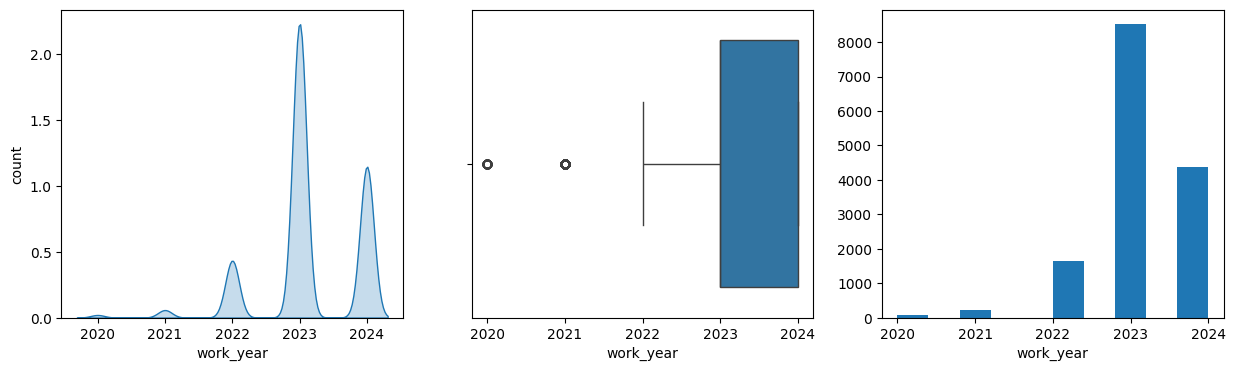

salary_in_usd
Skew : 1.52


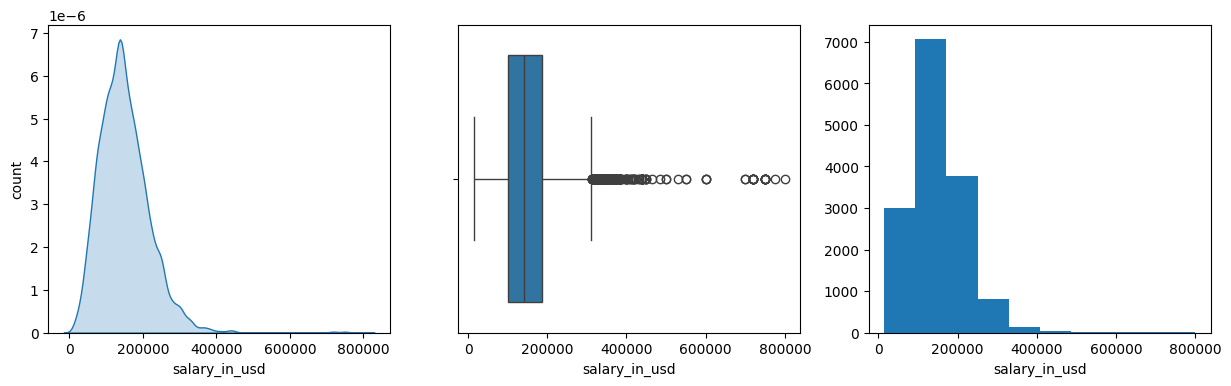

remote_ratio
Skew : 0.73


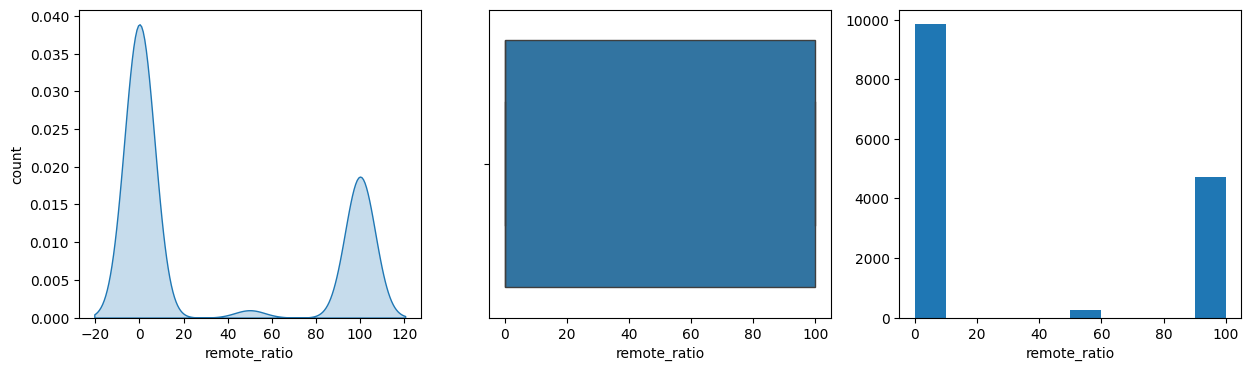

In [18]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize=(15,4))
    plt.subplot(1, 3, 1)
    sns.kdeplot(df[col], shade=True)
    plt.ylabel('count')
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col])
    plt.subplot(1, 3, 3)
    df[col].hist(grid=False)
    plt.xlabel(col)
    plt.show()

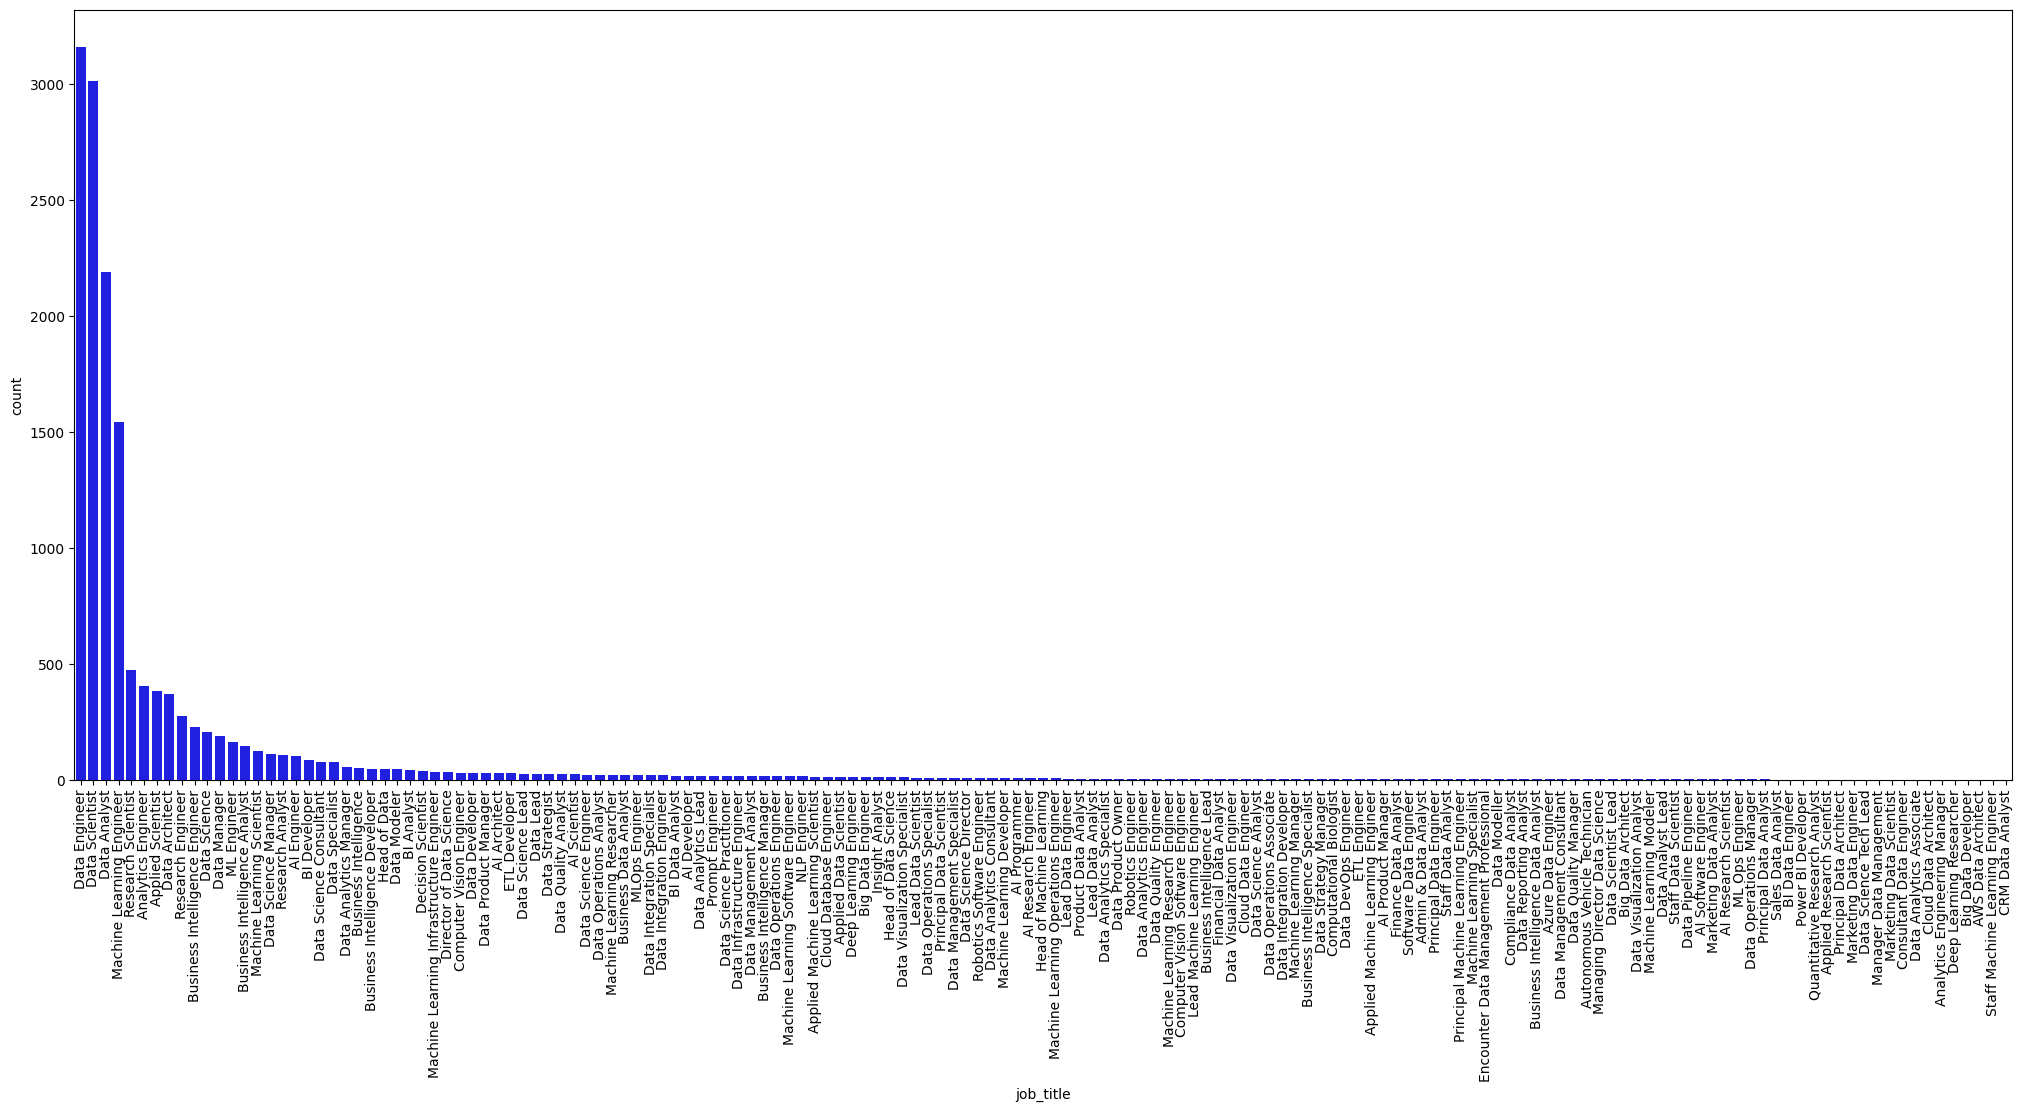

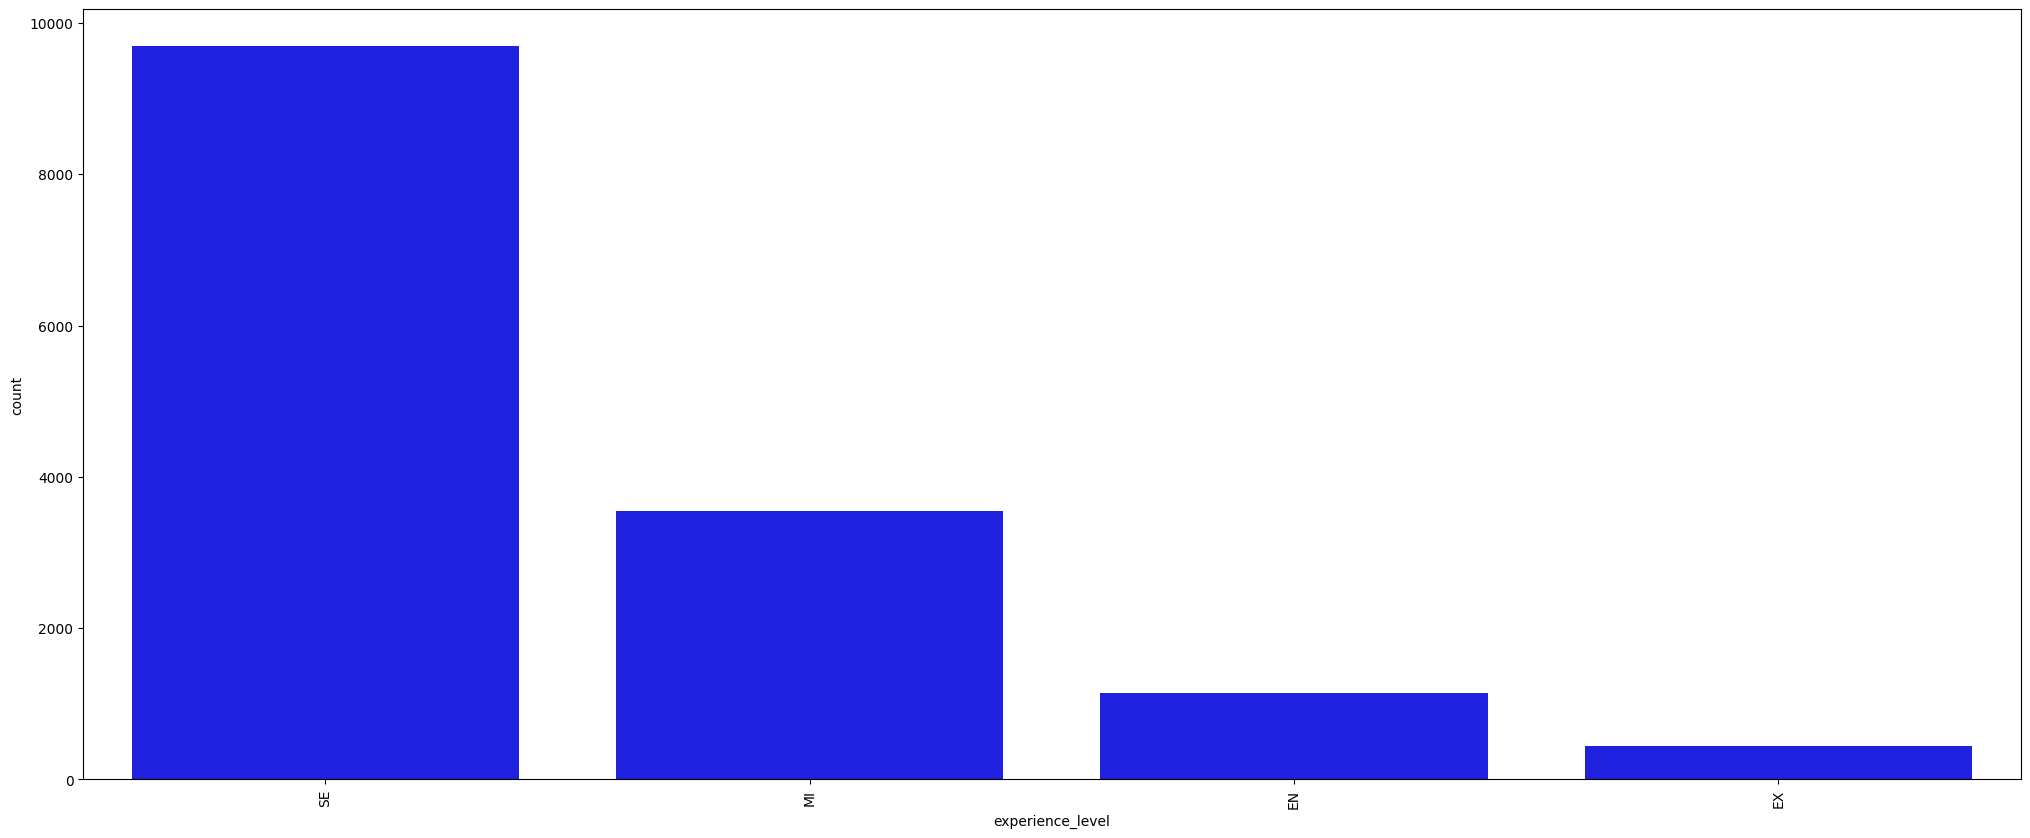

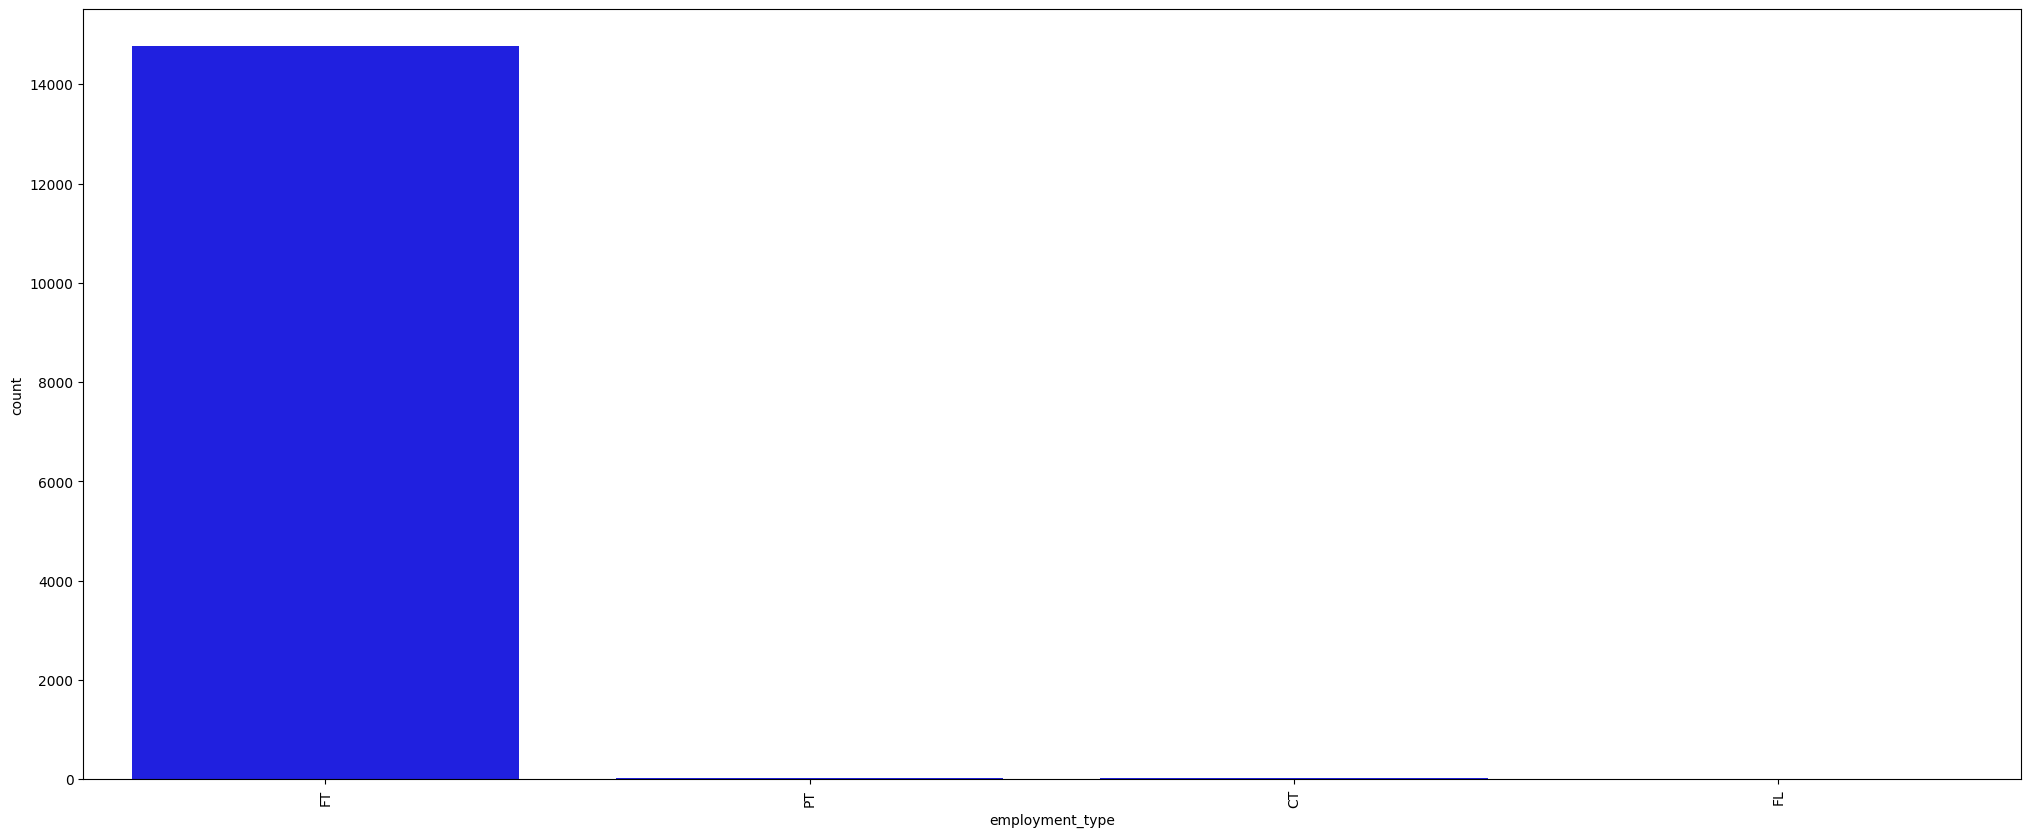

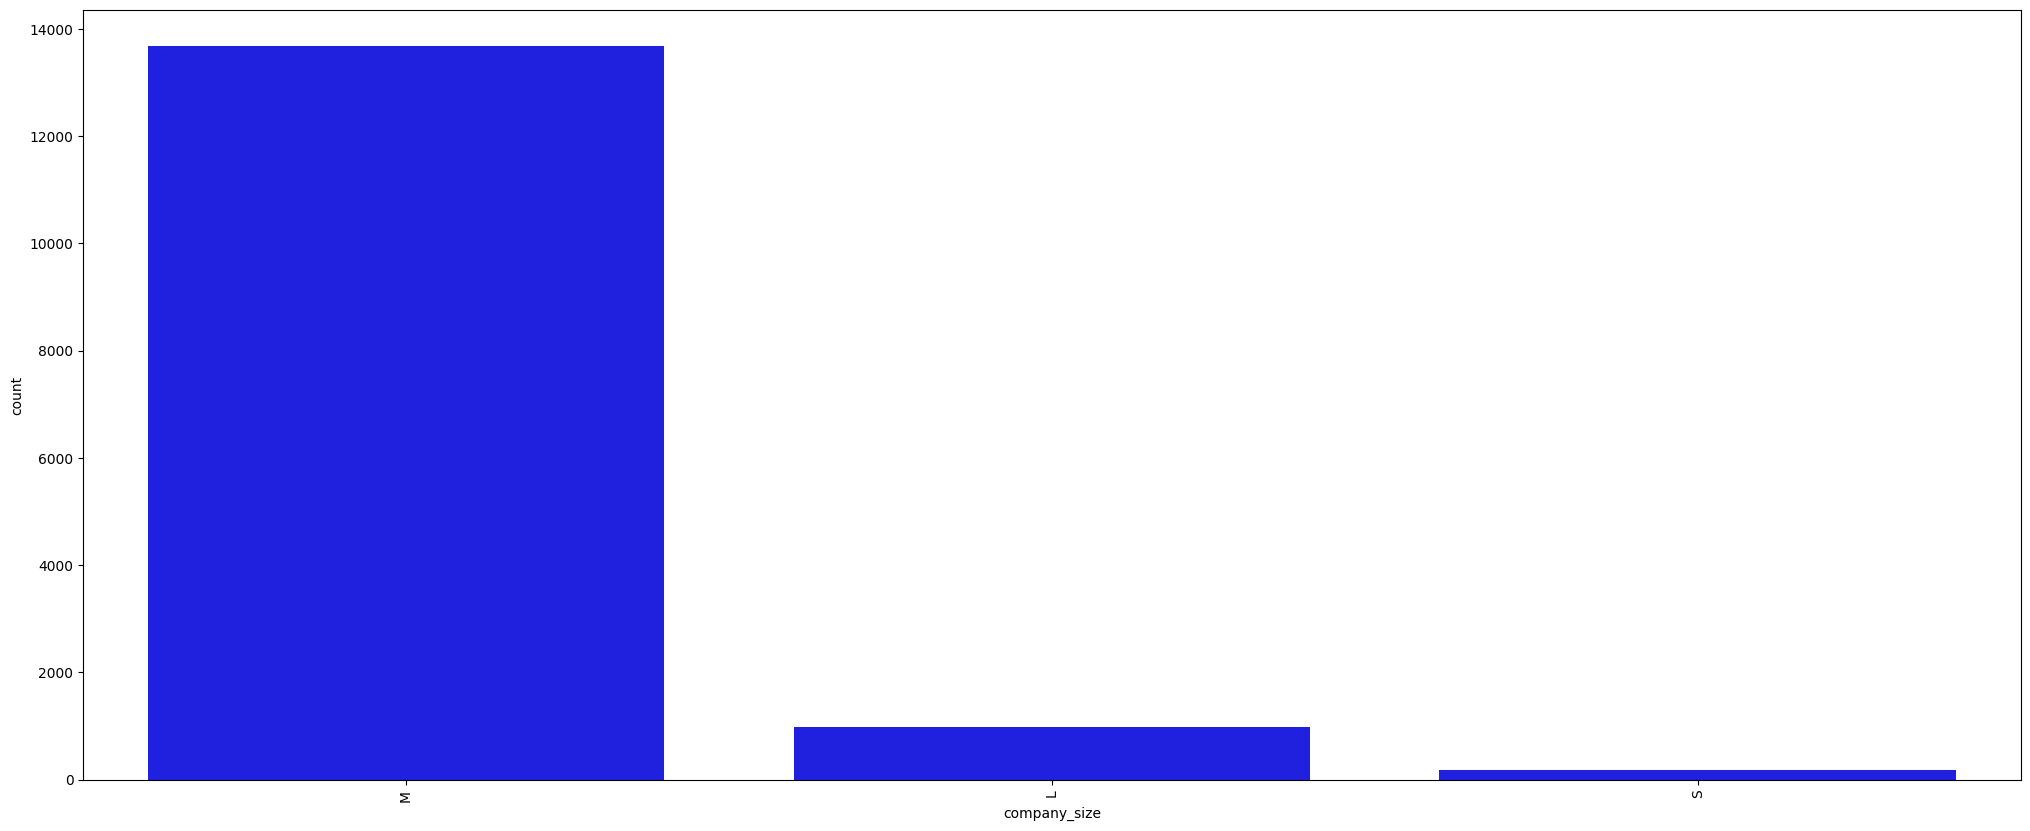

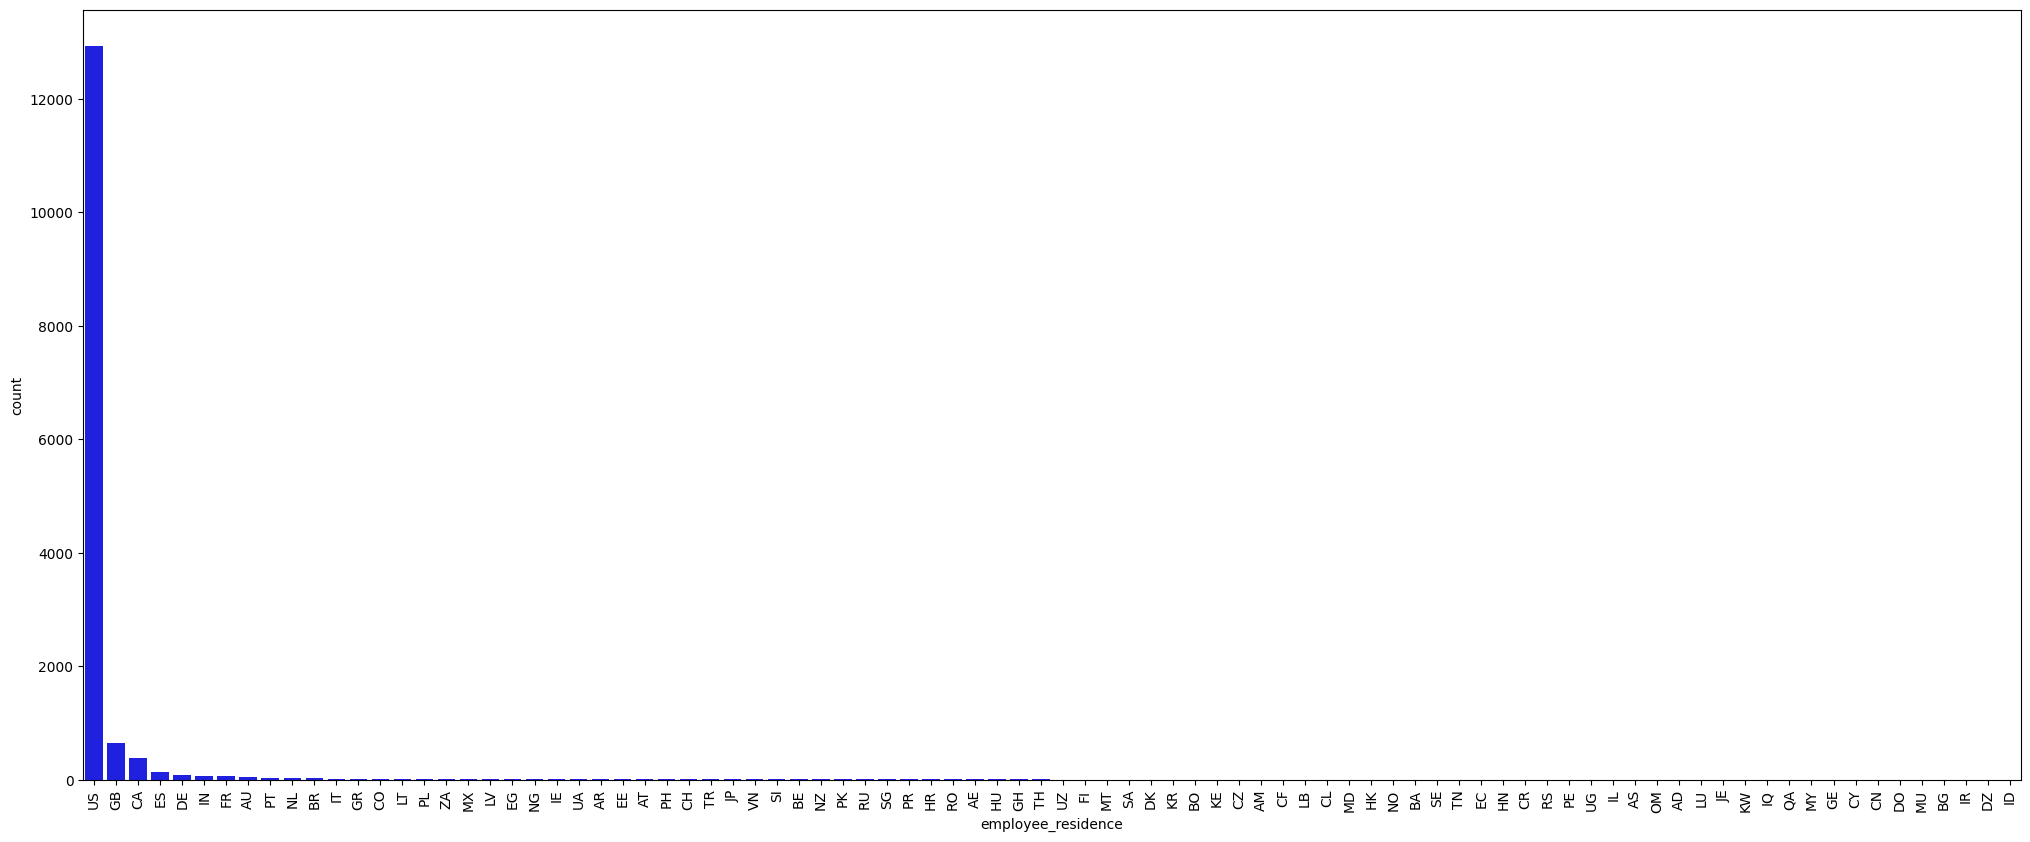

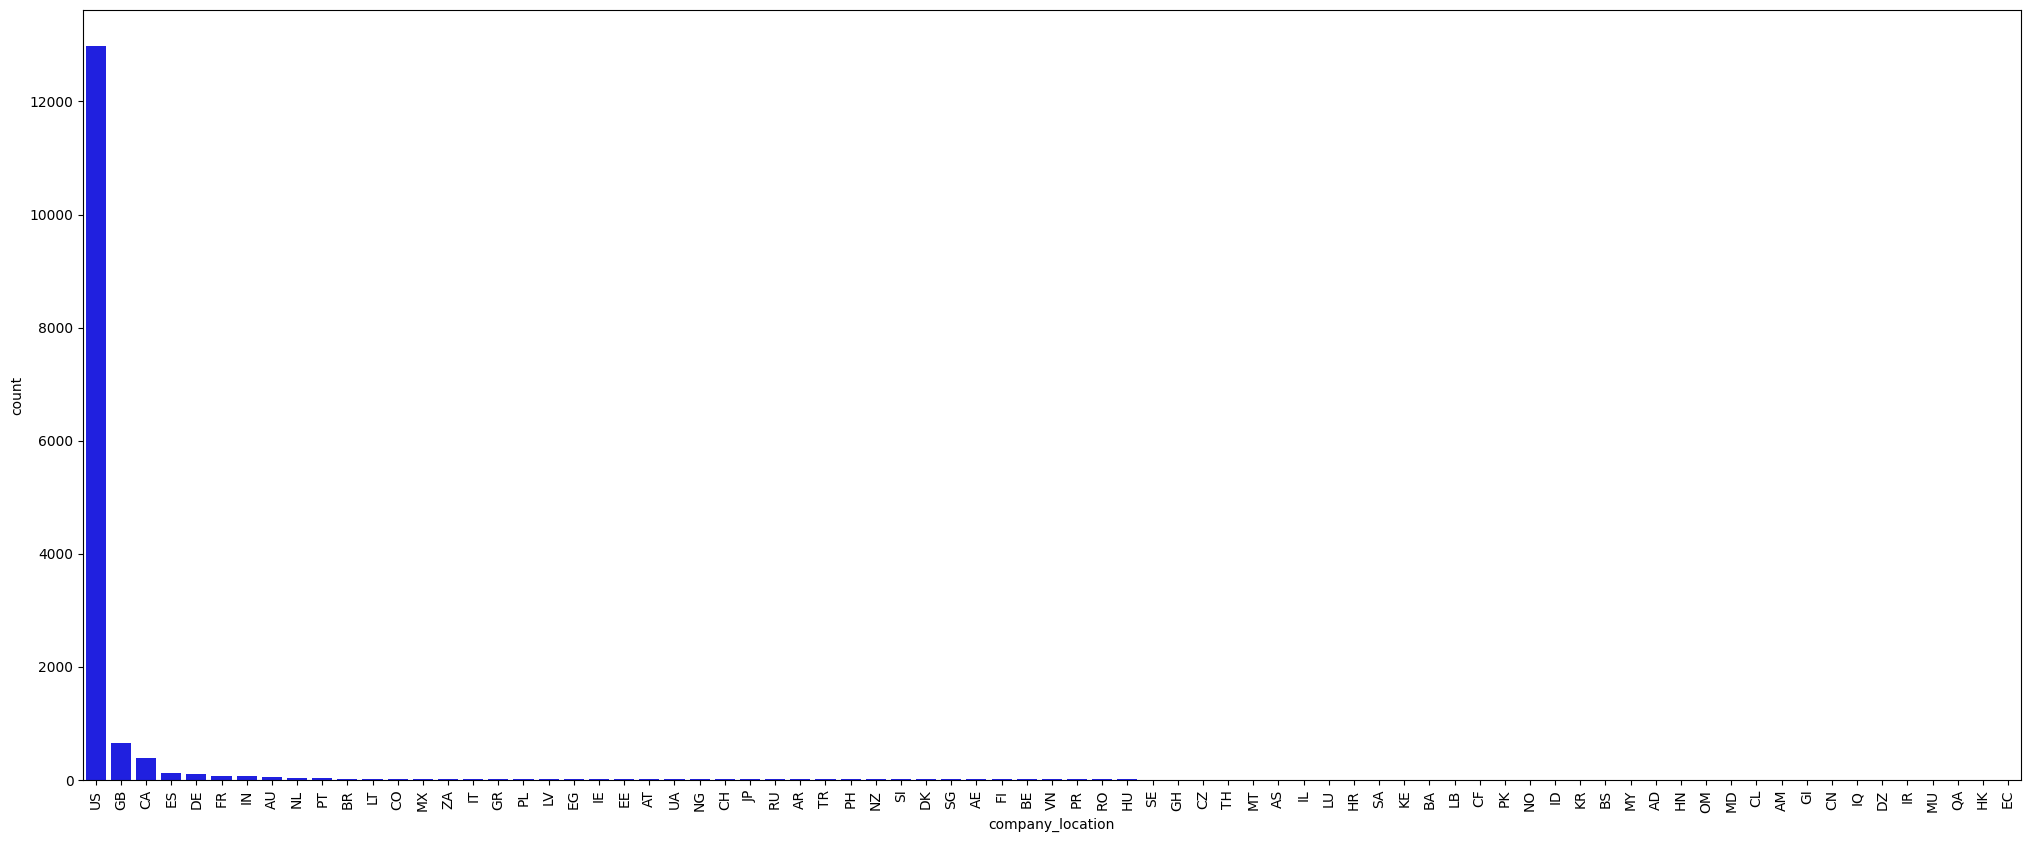

In [19]:
for col in cat_cols:
    plt.figure(figsize=(25,10))
    sns.countplot(x=col, data=df, color='blue', order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

Most of the data we have is from the USA, we could say that data science is in demand there as there is more industrialisation in the USA. However, it is also possible that there is a regional bias due to the home country of the author of this data.

Bivariable Analysis

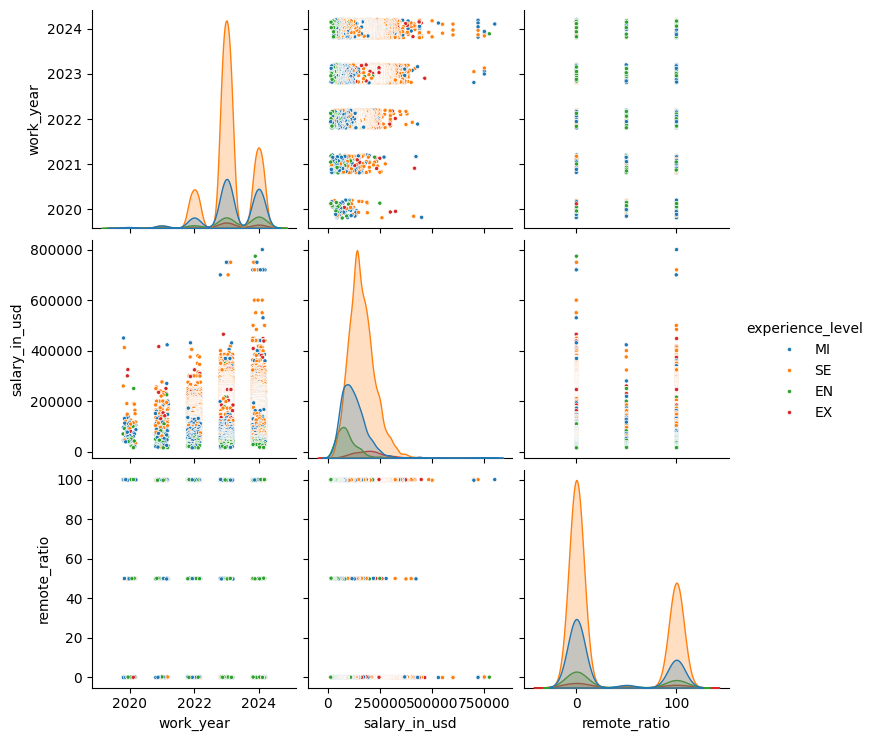

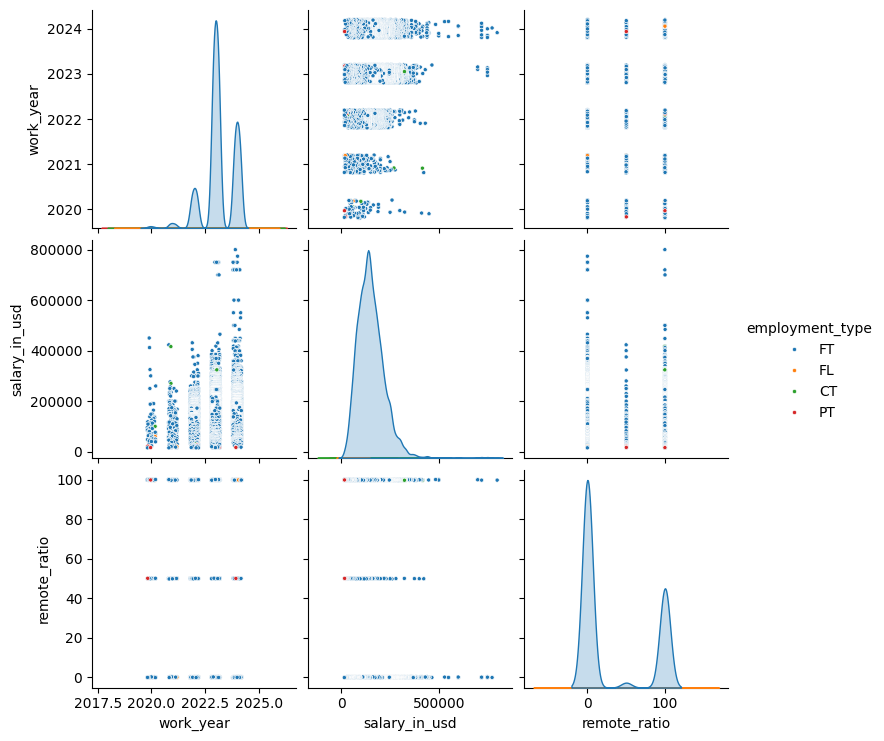

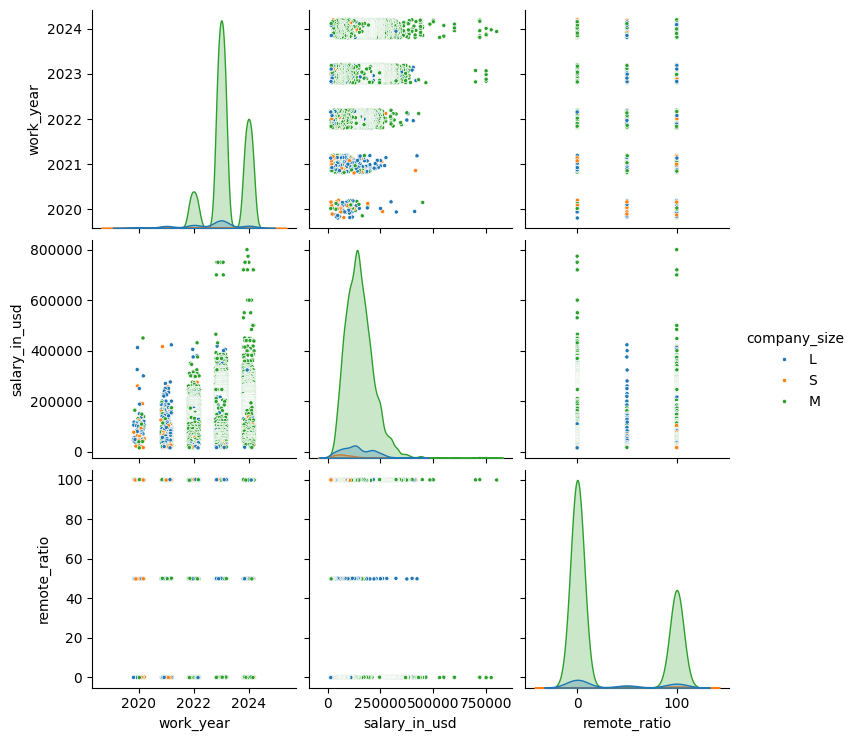

In [20]:
def add_jitter(data, jitter=0.2):
    if pd.api.types.is_numeric_dtype(data.dtype):
        return data + jitter * (2 * (0.5 - np.random.rand(len(data))))
    else:
        return data

for col in cat_cols1:
    df_jittered = df.drop(['diff_location', 'salary'], axis=1).apply(lambda x: add_jitter(x) if pd.api.types.is_numeric_dtype(x.dtype) else x)
    
    pairplot = sns.pairplot(data=df_jittered, hue=col, markers='.')
    plt.show()

Multivariable Analysis

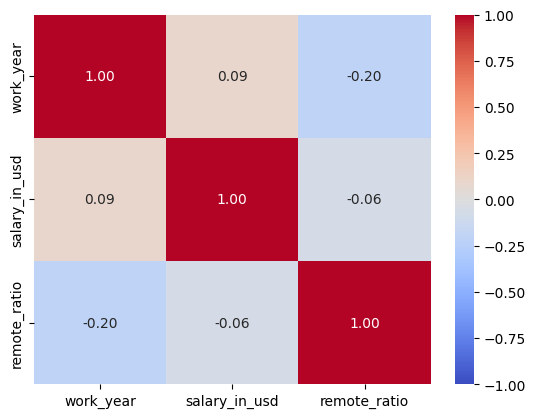

In [21]:
subset_df = df[['work_year', 'salary_in_usd', 'remote_ratio']]
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1)
plt.show()

Remote ratio is decreasing over the years, this means that more companies are encouraging employees to work from office after the COVID-19 outbreak.
Salaries have increased overall throughout the years.
Office jobs are high-paying over work-from-home and hybrid jobs.

QUESTIONS TIME!!!

Q- What are the salary trends over time?

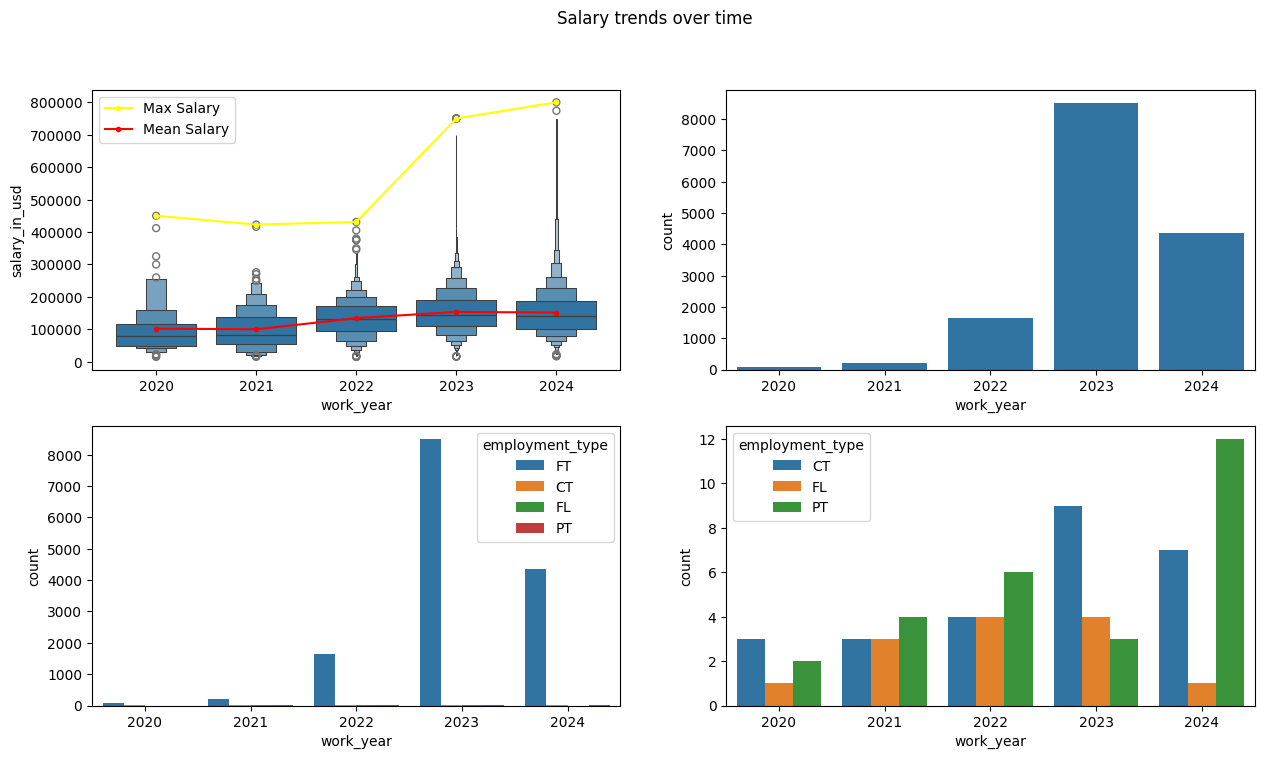

In [22]:
yearwise_mean_salary = df.groupby('work_year')['salary_in_usd'].mean()
yearwise_mean_salary_array = yearwise_mean_salary.values
yearwise_max_salary = df.groupby('work_year')['salary_in_usd'].max()
yearwise_max_salary_array = yearwise_max_salary.values
plt.figure(figsize=(15,8))
plt.suptitle('Salary trends over time')
plt.subplot(2,2,1)
sns.boxenplot(x='work_year', y='salary_in_usd', data=df)
plt.plot(yearwise_max_salary_array, label='Max Salary', marker='.', color='yellow')
plt.plot(yearwise_mean_salary_array, label='Mean Salary', marker='.', color='red')
plt.legend()
plt.subplot(2,2,2)
sns.countplot(x='work_year', data=df)
plt.subplot(2,2,3)
sns.countplot(x='work_year', data=df, hue='employment_type')
plt.subplot(2,2,4)
sns.countplot(x='work_year', data=df[df['employment_type'].isin(['CT', 'PT', 'FL'])], hue='employment_type')
plt.show()

The median and mean salary has been almost increasing over the years, with small exception in the years 2021 and 2024. However, the mean salary has always been above median salary. The max salary has also been almost highly increasing over the years. The year 2024 saw more jobs with higher-end packages. The enhanced box plot has been more and more pointing at the top and bottom over the years, this implies lesser range of the salaries and more number of entries in each quantiles. As a very high percent of jobs are full-time, there is no fruitful analysis to be done over employment type over the years. However, part time and contract based jobs have almost been increasing throughout the years, while freelancers are almost constant. But these numbers are so low that they do not paint an accurate picture.

Q- What are the salary trends by experience level?

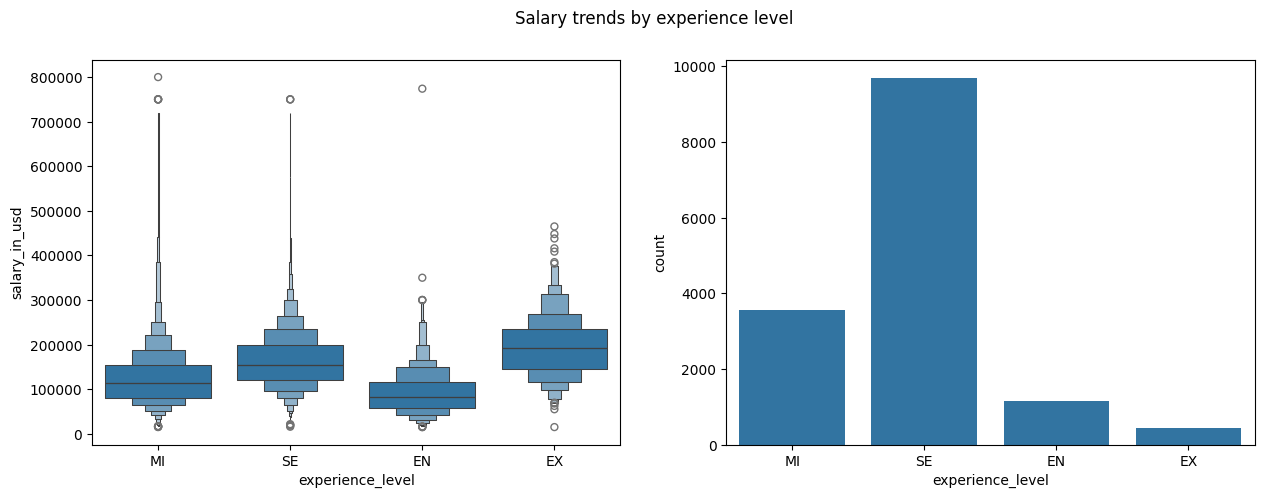

In [23]:
plt.figure(figsize=(15,5))
plt.suptitle('Salary trends by experience level')
plt.subplot(1,2,1)
sns.boxenplot(x='experience_level', y='salary_in_usd', data=df)
plt.subplot(1,2,2)
sns.countplot(x='experience_level', data=df)
plt.show()

The median salary is highest for executive level position, even though there are very less jobs for this category. However, there is not much skew in the data. The highest salary is for mid-level jobs and it is consistently high. The next high-salaried job is for entry level. However, it is just an outlier, which can be seen from the lowest median in the graph. Hence, the next highest paying which is consistently high is for senior level experience. The median salary increases with the level of experience, However, the same is not true for max salary. The pointy nature of the enhanced box plot in mid and senior level depicts the skewness of the data. Similarly, the entry and executive level are much more plateaud, implying closeness of most of the data entries.

Q- What are the salary trends by employment type?

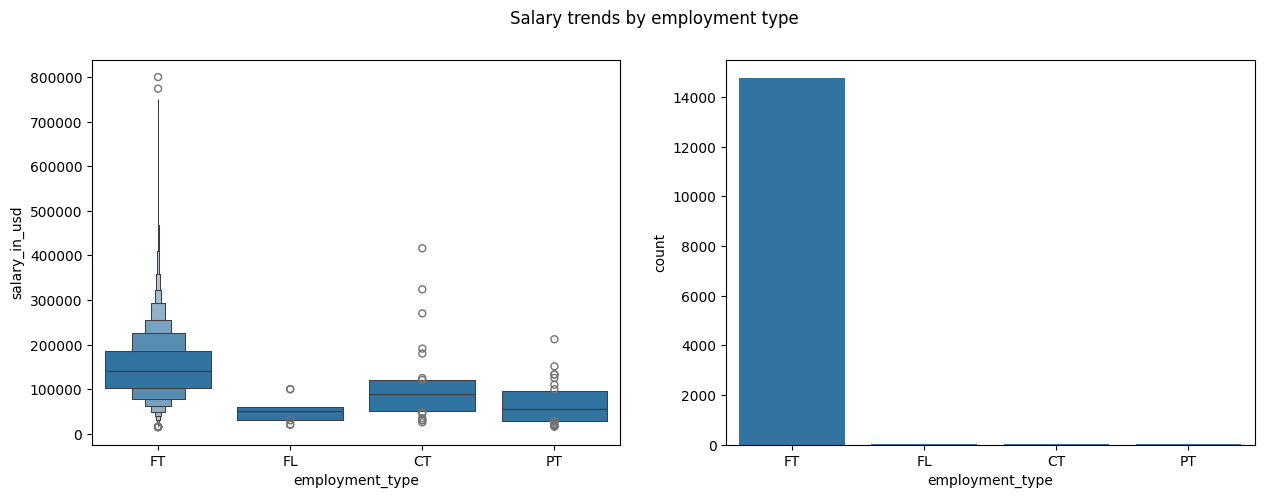

In [24]:
plt.figure(figsize=(15,5))
plt.suptitle('Salary trends by employment type')
plt.subplot(1,2,1)
sns.boxenplot(x='employment_type', y='salary_in_usd', data=df)
plt.subplot(1,2,2)
sns.countplot(x='employment_type', data=df)
plt.show()

Most of the jobs are full-time and also the higher paying ones, followed by contract based, part-time and then freelancers. However, the number of non-fulltime jobs are so low, we can not make much analysis of the data compared to full time jobs.

Q- What are the top 10 locations for data science jobs?

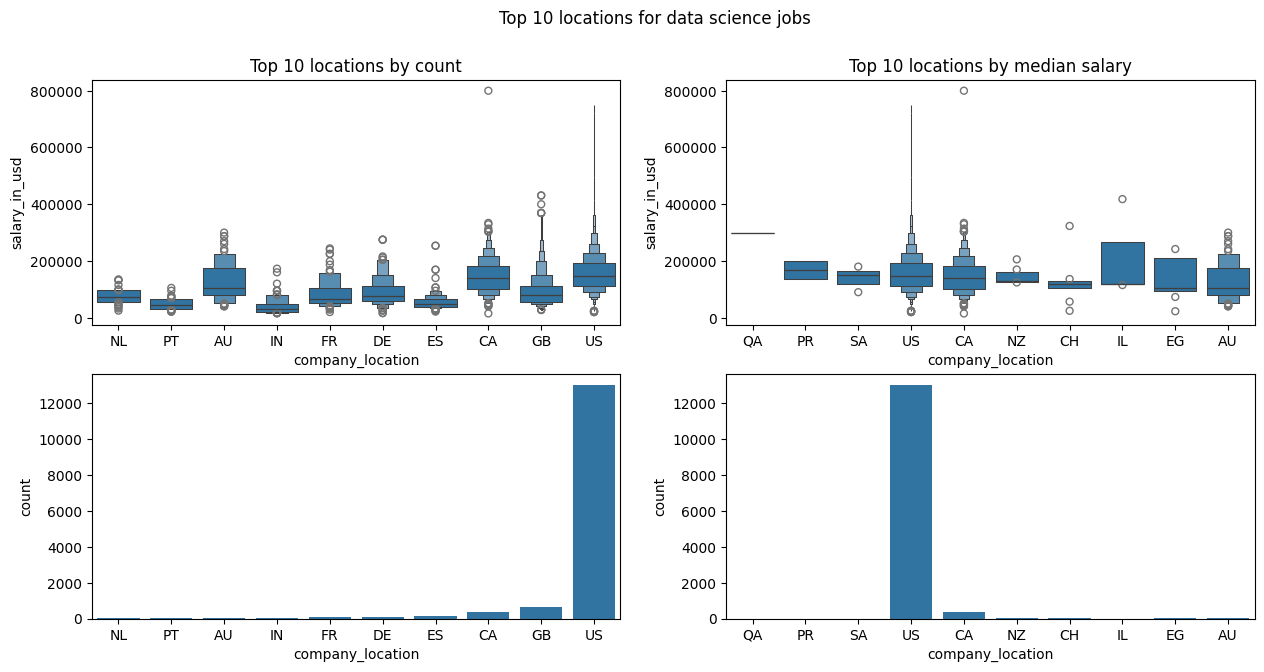

In [25]:
plt.figure(figsize=(15,7))
plt.suptitle('Top 10 locations for data science jobs')
plt.subplot(2,2,1)
plt.title('Top 10 locations by count')
location_counts = df['company_location'].value_counts()
top_10_locations = location_counts.head(10)
top_10_locations_by_count = top_10_locations.sort_values()
df_top_10_locations = df[df['company_location'].isin(top_10_locations.index)]
sns.boxenplot(x='company_location', y='salary_in_usd', data=df_top_10_locations, order=top_10_locations_by_count.index)
plt.subplot(2,2,3)
sns.countplot(x='company_location', data=df_top_10_locations, order=top_10_locations_by_count.index)
plt.subplot(2,2,2)
plt.title('Top 10 locations by median salary')
location_median_salary = df.groupby('company_location')['salary_in_usd'].median()
top_10_locations_by_median = location_median_salary.nlargest(10)
df_top_10_locations = df[df['company_location'].isin(top_10_locations_by_median.index)]
sns.boxenplot(x='company_location', y='salary_in_usd', data=df_top_10_locations, order=top_10_locations_by_median.index)
plt.subplot(2,2,4)
sns.countplot(x='company_location', data=df_top_10_locations, order=top_10_locations_by_median.index)
plt.show()

If one is looking to just get a job, then the top 10 locations by count would be the best bet for success. But if one wants to maximise the salary as well then one might think about locations like Qatar, Puerto Rico and Saudi Arabia, which are top 3 locations by median salary. However, these are just outliers having only 1-5 jobs. The best locations considering both count and median salary, locations like the USA, Canada, New Zealand, Switzerland, Egypt and Australia are a better option for a high paying job. Canada even has the highest paying package in the dataset. The dataset contains so many jobs from the USA that even the enhanced box plot shows pointy nature.

The heavy bias in the data for US related jobs discourages the analyst to make any analysis based on location

Q- What are the impacts of remote work?

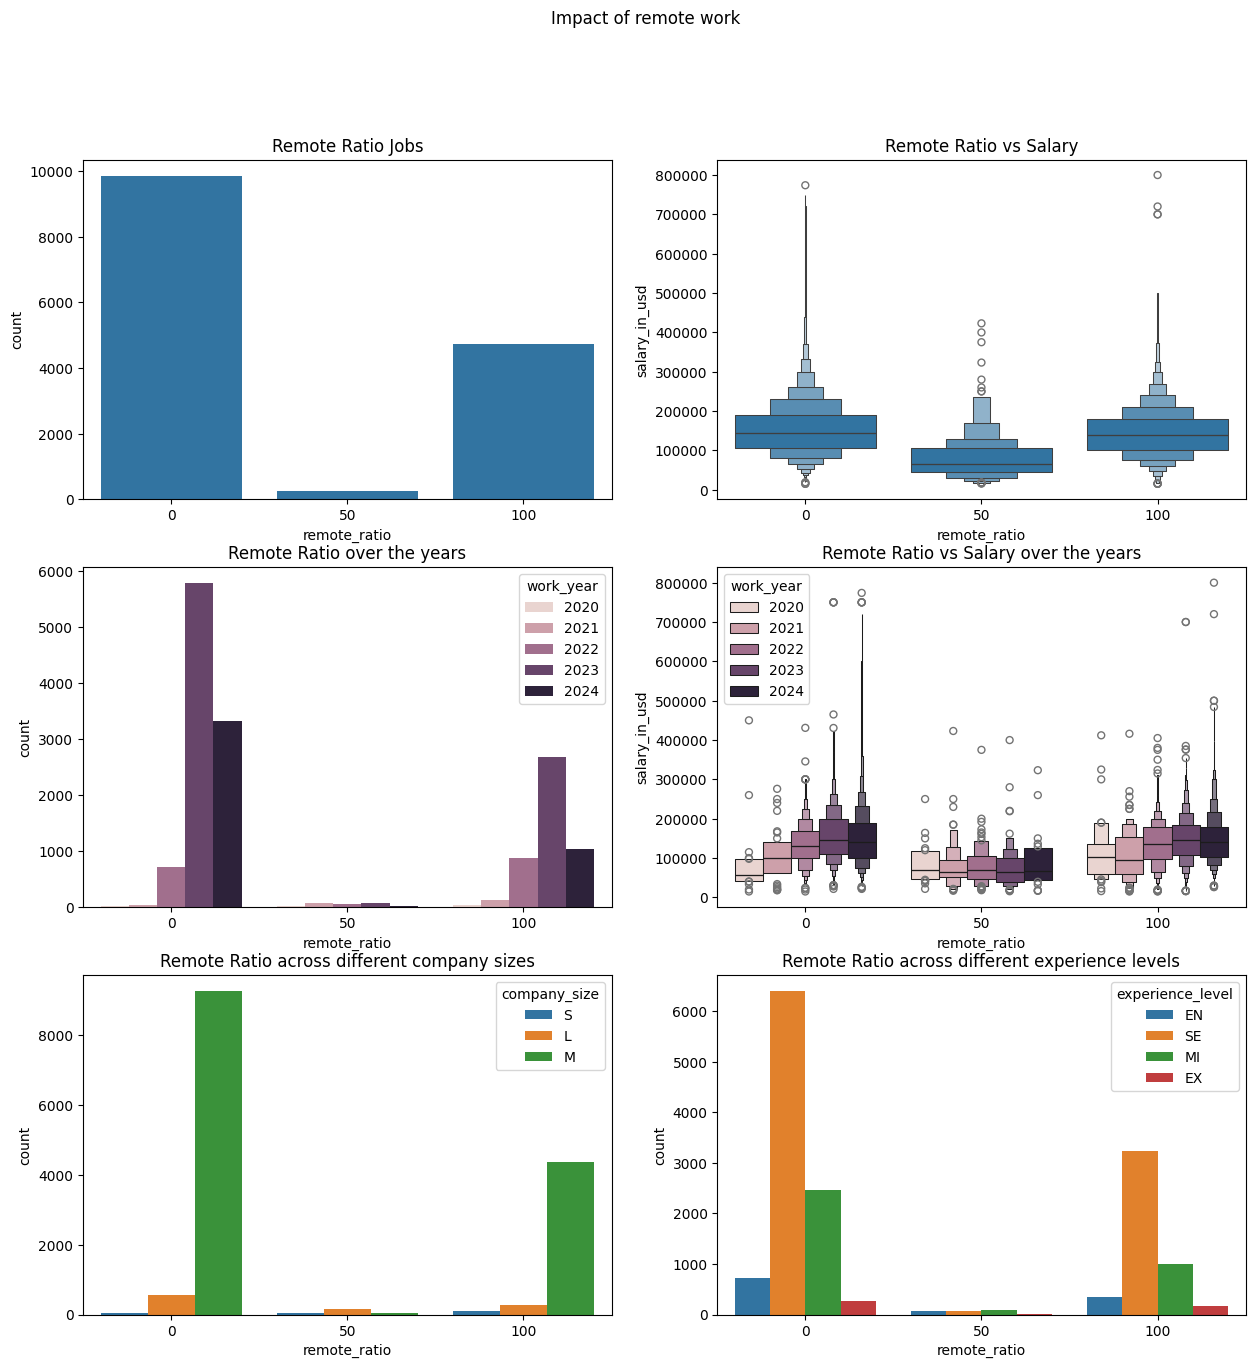

In [26]:
remote_ratio_order= ['0', '50', '100']
plt.figure(figsize=(15,15))
plt.suptitle('Impact of remote work')
#remote ratio count
plt.subplot(3,2,1)
plt.title('Remote Ratio Jobs')
sns.countplot(x='remote_ratio', data=df, order=remote_ratio_order)
#remote ratio vs salary
plt.subplot(3,2,2)
plt.title('Remote Ratio vs Salary')
sns.boxenplot(x='remote_ratio', y='salary_in_usd', data=df, order=remote_ratio_order)
#work year vs remote ratio
plt.subplot(3,2,3)
plt.title('Remote Ratio over the years')
sns.countplot(x='remote_ratio', data=df, order=remote_ratio_order, hue='work_year')
plt.subplot(3,2,4)
plt.title('Remote Ratio vs Salary over the years')
sns.boxenplot(x='remote_ratio', y='salary_in_usd', data=df, order=remote_ratio_order, hue='work_year')
#company size vs remote ratio
plt.subplot(3,2,5)
plt.title('Remote Ratio across different company sizes')
sns.countplot(x='remote_ratio', data=df, order=remote_ratio_order, hue='company_size')
#experience level vs remote ratio
plt.subplot(3,2,6)
plt.title('Remote Ratio across different experience levels')
sns.countplot(x='remote_ratio', data=df, order=remote_ratio_order, hue='experience_level')
plt.show()

Most of the jobs do not allow remote work, but there are a few which do. However, the number of hybrid jobs are even lesser. The highest salary is for remote work but that is just an outlier, as both the median salary and pointy enhanced box plot show that office jobs are higher paying overall. Company size, work year and experience don't matter much in terms of remote ratio. However, hybrid work balance can be seen most in large size companies by percentage of total jobs.

Q- What are the relations between company sizes and salary?

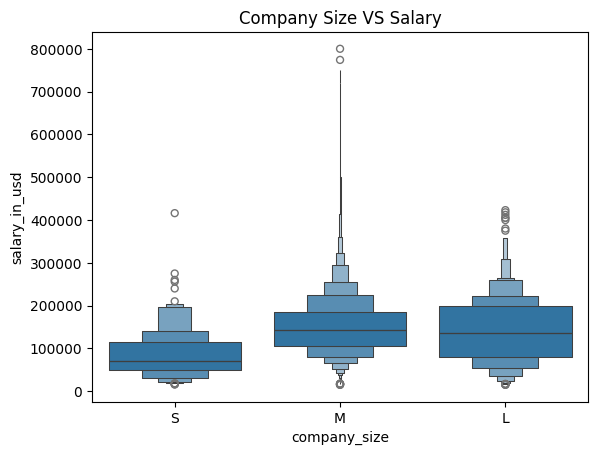

In [27]:
sns.boxenplot(x='company_size', y='salary_in_usd', data=df, order=['S', 'M', 'L'])
plt.title('Company Size VS Salary')
plt.show()

If one wants a job related to data science, they should target medium level companies as it is both highest paying and highest count.

Q- What are the top 10 positions related to data science?

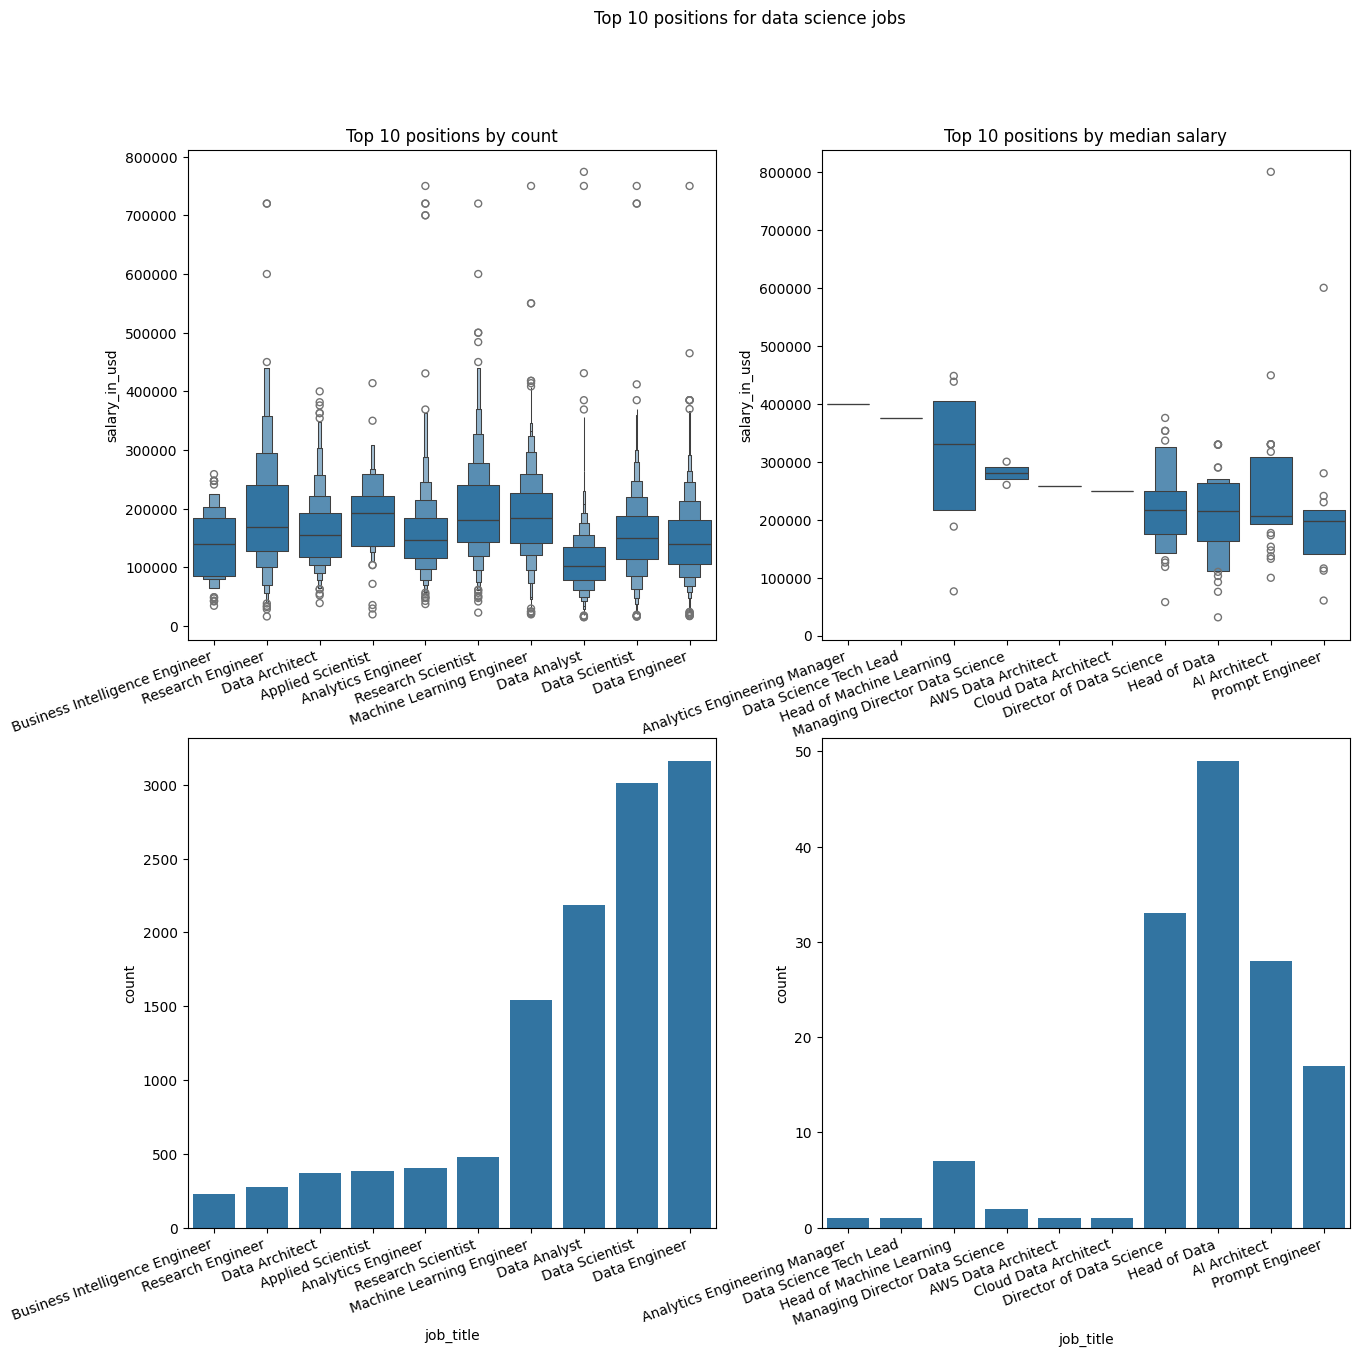

In [28]:
plt.figure(figsize=(15,14))
plt.suptitle('Top 10 positions for data science jobs')
plt.subplot(2,2,1)
plt.xticks(rotation=20, ha='right')
plt.title('Top 10 positions by count')
position_counts = df['job_title'].value_counts()
top_10_positions = position_counts.head(10)
top_10_positions_by_count = top_10_positions.sort_values()
df_top_10_positions = df[df['job_title'].isin(top_10_positions.index)]
sns.boxenplot(x='job_title', y='salary_in_usd', data=df_top_10_positions, order=top_10_positions_by_count.index)
plt.subplot(2,2,3)
plt.xticks(rotation=20, ha='right')
sns.countplot(x='job_title', data=df_top_10_positions, order=top_10_positions_by_count.index)
plt.subplot(2,2,2)
plt.xticks(rotation=20, ha='right')
plt.title('Top 10 positions by median salary')
position_median_salary = df.groupby('job_title')['salary_in_usd'].median()
top_10_positions_by_median = position_median_salary.nlargest(10)
df_top_10_positions = df[df['job_title'].isin(top_10_positions_by_median.index)]
sns.boxenplot(x='job_title', y='salary_in_usd', data=df_top_10_positions, order=top_10_positions_by_median.index)
plt.subplot(2,2,4)
plt.xticks(rotation=20, ha='right')
sns.countplot(x='job_title', data=df_top_10_positions, order=top_10_positions_by_median.index)
plt.show()

The top 10 lists for title is completely different when comparing against count and when comparing against median salary. Capsulating job titles like data engineer, scientist and analyst have the highest count of jobs, while lead positions like managers, tech leads and heads have the highest paying jobs by median. However, the max salary is still in favour of the favour of high count jobs.

Q- Does the job allow remote work when company location is different from employee residence?

(Even though the answer might seem obvious, let us still analyse)

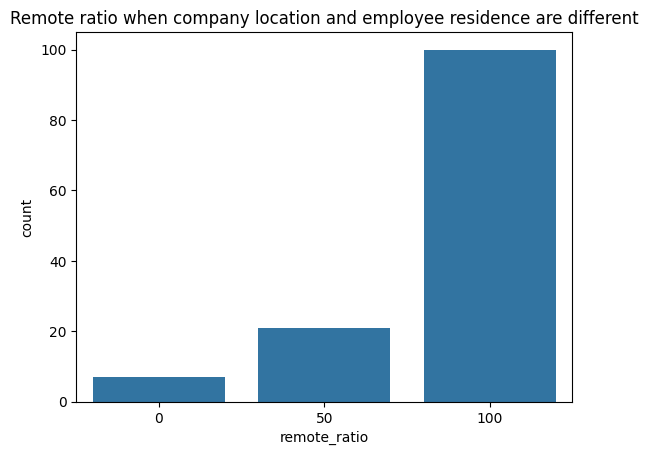

In [29]:
plt.title('Remote ratio when company location and employee residence are different')
sns.countplot(x='remote_ratio', data=df[df['diff_location'].isin([1])])
plt.show()

Almost all companies allow remote work when company location and employee residence are different. There are a few hybrids which might be due to the fact that companies might need employees which need to travel a lot. However, what is really absurd is the fact that some companies do not allow remote work even though the employee lives in a different location.

In [30]:
absurd_df=df[df['diff_location'].isin([1])]
absurder_df=absurd_df[df['remote_ratio'].isin([0])]
absurder_df

,job_title,work_year,experience_level,employment_type,company_size,salary_in_usd,salary_currency,salary,employee_residence,company_location,diff_location,remote_ratio
6667,Data Scientist,2023,EN,FT,M,34924,PLN,150000,TR,PL,1,0
10851,Data Science Manager,2022,EX,FT,L,106000,USD,106000,UZ,RU,1,0
11488,Research Scientist,2021,EN,FT,L,100000,USD,100000,JE,CN,1,0
13450,AI Programmer,2023,EN,FT,L,70000,USD,70000,IN,AU,1,0
14801,Data Engineer,2021,MI,FT,L,26005,EUR,22000,RO,US,1,0
14821,Data Engineer,2021,MI,FL,L,20000,USD,20000,IT,US,1,0
14834,Staff Data Analyst,2020,EX,FT,M,15000,USD,15000,NG,CA,1,0


The above entries show the afforementioned data. As employee residence is a lot far from company location(both location not in EU, or both not neighbouring loctaions). This could imply a few different things. Firstly, employee location might be referring to permanent address and employee must have taken work visa to work, or there is some discrepancy in the data, or the worker is highly dedicated towards their work. It might have been possible that the two locations are close by and allow free passage through the boundaries like the EU. However, that is not the case at all; all the entries have the two locations far apart. The closest which can be seen is in entry indiced '10851', Russia and Uzbekistan, but they too are still separated by a huge lake.

------------

Conclusions:-

This dataset provides insights into data science job salaries from 2020 to 2024, including information on experience levels, employment types, job titles, and company characteristics. It serves as a valuable resource for understanding salary trends and factors influencing compensation in the data science field. No null entries in the data eases our work a lot.

Most of the data we have is from the USA, we could say that data science is in demand there as there is more industrialisation in the USA. However, it is also possible that there is a regional bias due to the home country of the author of this data.

Over the years, 2023 saw a big boom in data science sector. 2024, even though has just started has already reached more than half the employments. The max, median and mean salary has been almost increasing over the years. Part time and contract based jobs have almost been increasing throughout the years, while freelancers are almost constant.


The median salary increases with increasing experience. However, the same is not true for max salaries. Most companies prefer senior level employees, followed by mid-level and entry-level. Companies do not need much executives.


Remote ratio is decreasing over the years, this means that more companies are encouraging employees to work from office after the COVID-19 outbreak. Most companies prefer office workers over work-from-home employees, with almost all jobs being full-time and being mostly hired by mid-size companies. Office jobs are high-paying over work-from-home and hybrid jobs. Company size, work year and experience don't matter much in terms of remote ratio.


If one is looking to just get a job, then the top 10 locations by count would be the best bet for success. But if one wants to maximise the salary as well then one might think about locations like Qatar, Puerto Rico and Saudi Arabia, which are top 3 locations by median salary. However, these are just outliers having only 1-5 jobs. The best locations considering both count and median salary, locations like the USA, Canada, New Zealand, Switzerland, Egypt and Australia are a better option for a high paying job. Canada even has the highest paying package in the dataset.


If one wants a job related to data science, they should target medium level companies as it is both highest paying and highest count.


The top 10 lists for title is completely different when comparing against count and when comparing against median salary. Capsulating job titles like data engineer, scientist and analyst have the highest count of jobs, while lead positions like managers, tech leads and heads have the highest paying jobs by median. However, the max salary is still in favour of the favour of high count jobs.


What was really absurd was the fact that some companies do not allow remote work even though the employee lives in a different location. This could imply a few different things. Firstly, employee location might be referring to permanent address and employee must have taken work visa to work, or there is some discrepancy in the data, or the worker is highly dedicated towards their work.

------------------------------

By this we conclude the analysis here. Thank you and please do upvote.